# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
df1 = pd.read_csv('Data/lans_Reactions4.csv')
df2 = pd.read_csv('Data/anhdaden1.csv')
df3=pd.read_csv('Data/lans_Reactions12.csv')






In [4]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
df3.dropna(subset=['reactions'], inplace=True)
df2.dropna(subset=['reactions'],inplace=True)
df = pd.concat([df2, df1,df3], axis=0, ignore_index=True)
df.dropna(subset=['reactions'], inplace=True)
df


,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,header
0,894292592055734,Cách này hay nè\n#anhdaden,Cách này hay nè\n#anhdaden,NaN,NaN,2023-11-22 20:30:37,1.700660e+09,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,"{'thích': 22, 'yêu thích': 1, 'haha': 25}",48,NaN,2035749833398248,NaN,8.942926e+14,['894292568722403'],False,2023-11-22 20:39:50.771920,NaN
1,896394561845537,Mới đầu tháng cháy ví cuối tháng lại cháy ví t...,Mới đầu tháng cháy ví cuối tháng lại cháy ví t...,NaN,NaN,2023-11-22 20:00:01,1.700658e+09,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,{'thích': 2966},2966,NaN,2035749833398248,NaN,8.963945e+14,['896394458512214'],False,2023-11-22 20:39:54.662762,NaN
2,896334455184881,Hảo xử lý\n#anhdaden,Hảo xử lý\n#anhdaden,NaN,NaN,2023-11-22 19:00:09,1.700654e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,"{'thích': 448, 'yêu thích': 1, 'haha': 510, 'w...",965,"[{'name': 'Bất ngờ ở quanh ta', 'link': '/watc...",2035749833398248,NaN,NaN,[],False,2023-11-22 20:40:00.745006,NaN
3,896323245186002,Không một động tác thừa\n#anhdaden,Không một động tác thừa\n#anhdaden,NaN,NaN,2023-11-22 16:00:06,1.700644e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,"{'thích': 514, 'yêu thích': 1, 'haha': 717, 'w...",1245,NaN,2035749833398248,NaN,NaN,[],False,2023-11-22 20:40:08.117473,NaN
4,894292282055765,Tay nhỏ thì chịu thôi\n#anhdaden,Tay nhỏ thì chịu thôi\n#anhdaden,NaN,NaN,2023-11-22 15:00:44,1.700640e+09,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,"{'thích': 440, 'haha': 248, 'wow': 2, 'thương ...",709,NaN,2035749833398248,NaN,8.942923e+14,['894292255389101'],False,2023-11-22 20:40:18.902593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2803185076654716,"Anh đùa rất vui, mong anh nghỉ cmn việc :))\n#...","Anh đùa rất vui, mong anh nghỉ cmn việc :))\n#...",NaN,NaN,2021-11-25 11:20:32,1.637814e+09,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,"{'thích': 48232, 'yêu thích': 142, 'haha': 597...",110659,NaN,2035749833398248,NaN,NaN,[],False,NaN,NaN
515,2802715326701691,Sẵn sàng tinh thần thép chị em ơi\n#anhdaden,Sẵn sàng tinh thần thép chị em ơi\n#anhdaden,NaN,NaN,2021-11-24 20:25:16,1.637760e+09,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,"{'thích': 5250, 'yêu thích': 22, 'haha': 7259,...",12822,NaN,2035749833398248,NaN,NaN,[],False,NaN,NaN
516,2802563466716877,Ôi thôi xong :))\n#anhdaden,Ôi thôi xong :))\n#anhdaden,NaN,NaN,2021-11-24 17:00:02,1.637748e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,"{'thích': 106743, 'yêu thích': 546, 'haha': 17...",300320,NaN,2035749833398248,NaN,NaN,[],False,NaN,NaN
517,2802537086719515,Trên mạng và ngoài đời 😅\n#anhdaden,Trên mạng và ngoài đời 😅\n#anhdaden,NaN,NaN,2021-11-24 15:24:30,1.637742e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,"{'thích': 122413, 'yêu thích': 974, 'haha': 19...",336696,NaN,2035749833398248,NaN,NaN,[],False,NaN,NaN


In [5]:
df['time'] = pd.to_datetime(df['time'])

# Sắp xếp DataFrame theo thứ tự giảm dần của cột 'time'
df.sort_values(by='time', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

df=df.iloc[:317]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        317 non-null    int64         
 1   text                           317 non-null    object        
 2   post_text                      317 non-null    object        
 3   shared_text                    0 non-null      object        
 4   original_text                  0 non-null      float64       
 5   time                           317 non-null    datetime64[ns]
 6   timestamp                      317 non-null    float64       
 7   image                          77 non-null     object        
 8   image_lowquality               317 non-null    object        
 9   images                         317 non-null    object        
 10  images_description             317 non-null    object        
 11  images_lowquality  

In [6]:
list_col_delete = ['text','original_text','timestamp','image_lowquality','images','images_description','images_lowquality','images_lowquality_description',
 'video',
 'video_duration_seconds',
 'video_height',
 'video_quality',
 'video_size_MB',
 'video_thumbnail',
 'video_watches',
 'video_width',
 'likes',
 'post_url',
 'link',
 'links',
 'user_id',
 'username',
 'user_url',
 'is_live',
 'factcheck',
 'shared_post_id',
 'shared_time',
 'shared_user_id',
 'shared_username',
 'shared_post_url',
 'available',
 'reactors',
 'w3_fb_url',
 'with',
 'page_id',
 'sharers',
 'image_id',
 'image_ids',
 'was_live',
 'fetched_time'
 ]
df = df.drop(list_col_delete, axis = 1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         317 non-null    int64         
 1   post_text       317 non-null    object        
 2   shared_text     0 non-null      object        
 3   time            317 non-null    datetime64[ns]
 4   image           77 non-null     object        
 5   video_id        238 non-null    float64       
 6   comments        317 non-null    int64         
 7   shares          317 non-null    int64         
 8   comments_full   317 non-null    object        
 9   reactions       317 non-null    object        
 10  reaction_count  317 non-null    int64         
 11  header          12 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 29.8+ KB


In [8]:
import datetime

df['comments_full'] = df['comments_full'].apply(lambda x: eval(x) if isinstance(x, str) else x)


top_commenter = df['comments_full'].apply(lambda x: x[0]['commenter_name'] if x else None).value_counts().idxmax()
top_comment_count = df['comments_full'].apply(lambda x: x[0]['commenter_name'] if x else None).value_counts().max()
print(f"Người bình luận nhiều nhất: {top_commenter} with {top_comment_count} bình luận")

Người bình luận nhiều nhất: Anh Da Đen with 270 bình luận


In [9]:
df['comments_full'] = df['comments_full'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Tính số lượng bình luận của mỗi người và lấy danh sách top commenter
commenter_counts = df['comments_full'].apply(lambda x: x[0]['commenter_name'] if x else None).value_counts()
top_commenters = commenter_counts.index.tolist()

# Lấy số lượng bình luận của top commenter
top_comment_counts = commenter_counts.tolist()

# In danh sách top commenter và số lượng bình luận của họ
print("Danh sách top commenter:")
for commenter, comment_count in zip(top_commenters, top_comment_counts):
    print(f"{commenter}: {comment_count} bình luận")

Danh sách top commenter:
Anh Da Đen: 270 bình luận
Phương Thảo: 2 bình luận
Guiller Luzong: 2 bình luận
Cậu Út Họ Thái: 1 bình luận
Hiệp Trần: 1 bình luận
Diễn Foolish: 1 bình luận
Lê Tiến Thành: 1 bình luận
Nghia Pham: 1 bình luận
Đức Tuấn: 1 bình luận
Vũ Hoàngg Diệp: 1 bình luận
Triệu Minh Vũ: 1 bình luận
Hoàng Tấn: 1 bình luận
Ngô Kiều Bích: 1 bình luận
Nguyễn Tấn Hữu: 1 bình luận
Nguyễn Minh Trí: 1 bình luận
Lê Minh Trí: 1 bình luận
Phan Duy Hào: 1 bình luận
Đặng Ngọc Quang: 1 bình luận
David Hùng: 1 bình luận
Thomas Duong: 1 bình luận
Doả Cấp Ba: 1 bình luận
Thắng Phùng: 1 bình luận
Bé My: 1 bình luận
Dong Vu: 1 bình luận
Nguyễn Vân Khánh: 1 bình luận
Dương Hiệp: 1 bình luận
BEE Clothing: 1 bình luận
Nam Bao: 1 bình luận
Trần Phúc: 1 bình luận
Nguyễn Trần Thuận: 1 bình luận
Ngô Văn Trình: 1 bình luận
Danh Trần Công: 1 bình luận
Minh Trần: 1 bình luận
Phạm Thanh: 1 bình luận
Nguyễn Thị Xen: 1 bình luận
Hoang Hieu Nguyen: 1 bình luận
Huy Phan: 1 bình luận
Mi Shi Huan Jing: 1 bình lu

In [10]:
df['comments_full'] = df['comments_full'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# total_comments = df['comments_full'].apply(lambda x: len(x) if x else 0).sum()
total_comments = df['comments'].sum()
print(f"Tổng số lượng comment trong tất cả các bài đăng: {total_comments}")
print(f"số lượng comment trung bình : {total_comments/318}")

Tổng số lượng comment trong tất cả các bài đăng: 32624
số lượng comment trung bình : 102.59119496855345


In [11]:
total_comments = df['comments'].sum()
print(f"Tổng số lượng bình luận: {total_comments}")

# Chuyển đổi cột 'time' sang định dạng datetime
df['time'] = pd.to_datetime(df['time'])

# Tính toán ngày có nhiều bình luận nhất
comment_per_day = df.groupby(df['time'].dt.date)['comments'].sum().idxmax()
print(f"Ngày có nhiều bình luận nhất: {comment_per_day}")

# Tính toán số lượng bình luận trong ngày đó
comment_count_for_day = df.groupby(df['time'].dt.date)['comments'].sum().max()
print(f"Số lượng bình luận trong ngày: {comment_count_for_day}")



Tổng số lượng bình luận: 32624
Ngày có nhiều bình luận nhất: 2023-08-25
Số lượng bình luận trong ngày: 1398


In [12]:
df['time']

0     2023-11-22 20:30:37
1     2023-11-22 20:00:01
2     2023-11-22 19:00:09
3     2023-11-22 16:00:06
4     2023-11-22 15:00:44
              ...        
312   2023-08-22 09:00:01
313   2023-08-21 21:01:32
314   2023-08-21 20:00:02
315   2023-08-21 19:02:11
316   2023-08-21 16:00:53
Name: time, Length: 317, dtype: datetime64[ns]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

comments = df['comments_full'].apply(lambda x: x[0]['comment_text'] if x else None).dropna()
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# In ra 10 từ phổ biến nhất
common_words = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out())
top_words = common_words.T.sort_values(0, ascending=False).head(50)
print("Từ phổ biến nhất trong bình luận:")
print(top_words)


Từ phổ biến nhất trong bình luận:
           0
https    453
shope    400
ee       400
giảm     296
từ       245
đơn      239
voucher  158
0đ       117
50k       66
99k       55
cho       52
là        52
0h        51
ngày      51
ly        40
link      37
lưu       37
ngay      36
mã        34
và        33
tại       32
dùng      32
25        31
tháng     30
12h       30
rebrand   29
200k      29
thì       28
thời      28
có        27
vào       27
50        27
game      26
ns57jc6   26
đây       26
siêu      26
tải       26
100k      26
500k      25
nhập      25
sale      25
trang     25
111k      24
15        24
10        24
199k      23
cả        23
này       22
lúc       21
người     20


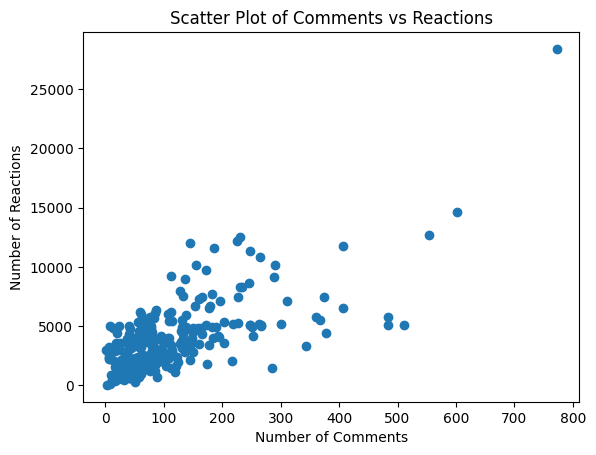

In [14]:

plt.scatter(df['comments'], df['reaction_count'])
plt.title('Scatter Plot of Comments vs Reactions')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Reactions')
plt.show()


In [15]:
correlation_comments_reactions = df['comments'].corr(df['reaction_count'])
print(f'tương quan giữa Comments và Reactions: {correlation_comments_reactions}')


tương quan giữa Comments và Reactions: 0.7101347156994324


In [16]:
video_counts = df['video_id'].notna().sum()
print('số bài có video ',video_counts)


số bài có video  238


In [17]:
# Tổng số lượng reactions theo video và không có video
reactions_by_video = df.groupby('video_id')['reaction_count'].sum()
print(reactions_by_video.mean())


3010.701680672269


In [18]:

# Tính trung bình số lượng reactions cho các bài viết có video
mean_reaction_with_video = df.loc[~df['video_id'].isnull(), 'reaction_count'].mean()

# Tính trung bình số lượng reactions cho các bài viết không có video
mean_reaction_without_video = df.loc[df['video_id'].isnull(), 'reaction_count'].mean()

# In kết quả
print(f"Trung bình số lượng reactions cho bài viết có video: {mean_reaction_with_video}")
print(f"Trung bình số lượng reactions cho bài viết không có video: {mean_reaction_without_video}")


Trung bình số lượng reactions cho bài viết có video: 3010.701680672269
Trung bình số lượng reactions cho bài viết không có video: 5109.822784810127


In [19]:
# Convert string representations of dictionaries to actual dictionaries, handling NaN values
df['reactions'] = df['reactions'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else {})

def get_likes(reactions_dict):
    if isinstance(reactions_dict, dict) and 'thích' in reactions_dict:
        return reactions_dict['thích']
    else:
        return 0

def get_cares(reactions_dict):
    if isinstance(reactions_dict, dict) and 'thương thương' in reactions_dict:
        return reactions_dict['thương thương' ]
    else:
        return 0        

def get_loves(reactions_dict):
    if isinstance(reactions_dict, dict) and 'yêu thích' in reactions_dict:
        return reactions_dict['yêu thích']
    else:
        return 0


def get_sads(reactions_dict):
    if isinstance(reactions_dict, dict) and 'buồn' in reactions_dict:
        return reactions_dict['buồn']
    else:
        return 0

def get_hahas(reactions_dict):
    if isinstance(reactions_dict, dict) and 'haha' in reactions_dict:
        return reactions_dict['haha']
    else:
        return 0

def get_wows(reactions_dict):
    if isinstance(reactions_dict, dict) and 'wow' in reactions_dict:
        return reactions_dict['wow']
    else:
        return 0

def get_shares(reactions_dict):
    if isinstance(reactions_dict, dict) and 'shares' in reactions_dict:
        return reactions_dict['shares']
    else:
        return 0

# Apply the functions to create new columns
df['total_likes'] = df['reactions'].apply(get_likes)
df['total_sads'] = df['reactions'].apply(get_sads)
df['total_hahas'] = df['reactions'].apply(get_hahas)
df['total_wows'] = df['reactions'].apply(get_wows)
df['total_loves']=df['reactions'].apply(get_loves)
df['total_cares']=df['reactions'].apply(get_cares)

total_likes_sum = df['total_likes'].sum()
total_sads_sum = df['total_sads'].sum()
total_hahas_sum = df['total_hahas'].sum()
total_wows_sum = df['total_wows'].sum()
total_shares_sum = df['shares'].sum()
total_loves_sum = df['total_loves'].sum()
total_cares_sum = df['total_cares'].sum()
# Print the totals
print(f'Total likes: {total_likes_sum}')
print(f'Total sads: {total_sads_sum}')
print(f'Total hahas: {total_hahas_sum}')
print(f'Total wows: {total_wows_sum}')
print(f'Total shares: {total_shares_sum}')
print(f'Total loves: {total_cares_sum}')
print(f'Total cares: {total_loves_sum}')

Total likes: 576602
Total sads: 17175
Total hahas: 511759
Total wows: 4149
Total shares: 7959
Total loves: 1597
Total cares: 8835


In [20]:
print(f'trung bình likes: {total_likes_sum/318}')
print(f'trung bình sads: {total_sads_sum/318}')
print(f'trung bình hahas: {total_hahas_sum/318}')
print(f'trung bình wows: {total_wows_sum/318}')
print(f'trung bình shares: {total_shares_sum/318}')
print(f'trung bình loves: {total_cares_sum/318}')
print(f'trung bình cares: {total_loves_sum/318}')

trung bình likes: 1813.2138364779873
trung bình sads: 54.009433962264154
trung bình hahas: 1609.3050314465409
trung bình wows: 13.047169811320755
trung bình shares: 25.028301886792452
trung bình loves: 5.022012578616352
trung bình cares: 27.78301886792453


In [21]:
most_reacted_post = df.loc[df['reaction_count'].idxmax()]
print(most_reacted_post.post_id)
most_commented_post = df.loc[df['comments'].idxmax()]
print(most_commented_post)
most_shared_post = df.loc[df['shares'].idxmax()]
print(most_shared_post)

889441425874184
post_id                                             889441425874184
post_text                Đứng nhìn thôi chứ biết sao giờ\n#anhdaden
shared_text                                                     NaN
time                                            2023-11-14 09:00:05
image             https://m.facebook.com/photo/view_full_size/?f...
video_id                                                        NaN
comments                                                        772
shares                                                          192
comments_full     [{'comment_id': '362614069562005', 'comment_ur...
reactions         {'thích': 10342, 'yêu thích': 41, 'haha': 1765...
reaction_count                                                28382
header                                                          NaN
total_likes                                                   10342
total_sads                                                      273
total_hahas                     

Text(0, 0.5, 'Posts')

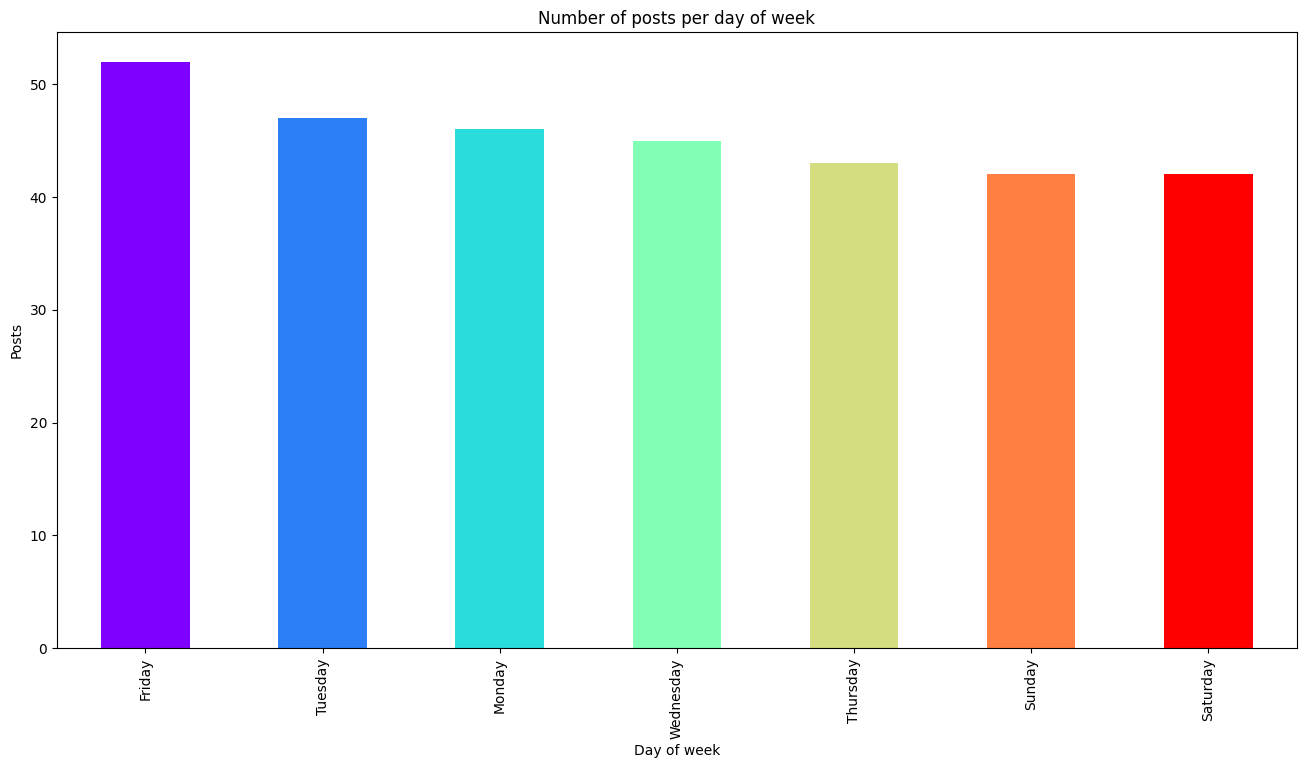

In [22]:
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['week_day'] = df['time'].apply(lambda x: week_day[x.weekday()])
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(df['week_day'].unique())))
df['week_day'].value_counts().plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of posts per day of week')
plt.xlabel('Day of week')
plt.ylabel('Posts')

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


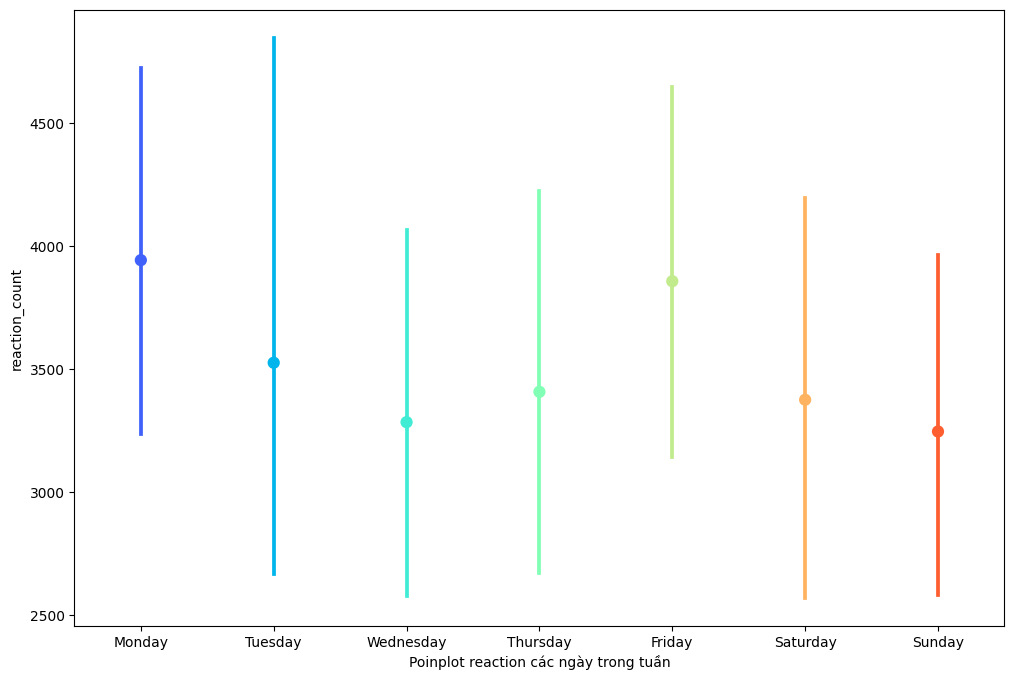

In [23]:

week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['week_day'] = pd.Categorical(df['week_day'], categories=week_day_order, ordered=True)

plt.figure(figsize=(12, 8))
sns.pointplot(x='week_day', y='reaction_count', data=df, palette='rainbow')

plt.xlabel('Poinplot reaction các ngày trong tuần')

plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Hour')

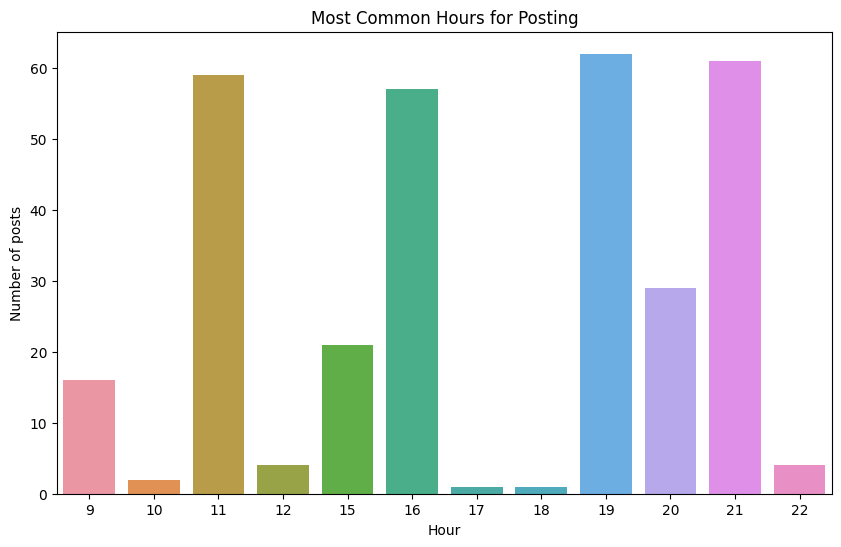

In [24]:
# Extract the hour from the time column
df['hour'] = df['time'].dt.hour

# Count the frequency of each hour
hour_counts = df['hour'].value_counts()

# Plot the most common hours for posting
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Most Common Hours for Posting')
plt.ylabel('Number of posts')
plt.xlabel('Hour')

Correlation with interaction and posted time

In [25]:
df['hour']

0      20
1      20
2      19
3      16
4      15
       ..
312     9
313    21
314    20
315    19
316    16
Name: hour, Length: 317, dtype: int32

<Axes: >

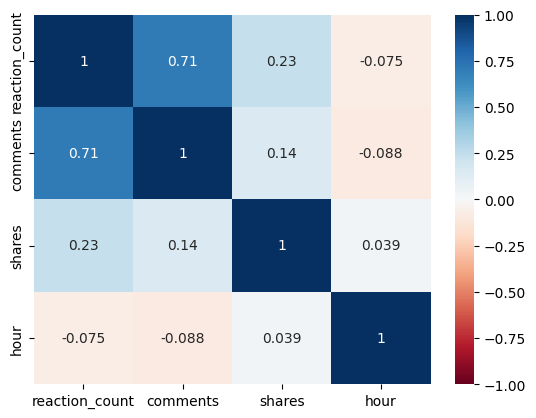

In [26]:
corr = df[['reaction_count', 'comments', 'shares', 'hour']].corr()
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1)

<Axes: >

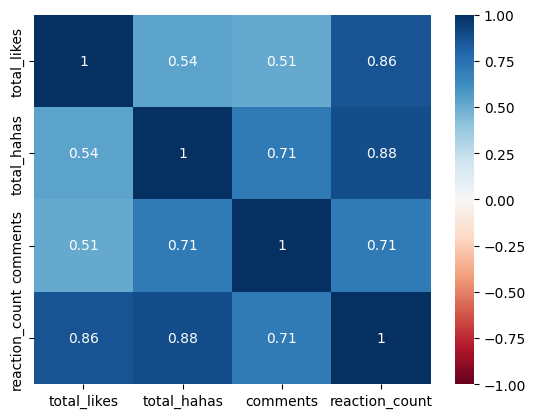

In [56]:
corr = df[['total_likes', 'total_hahas', 'comments','reaction_count']].corr()
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1)

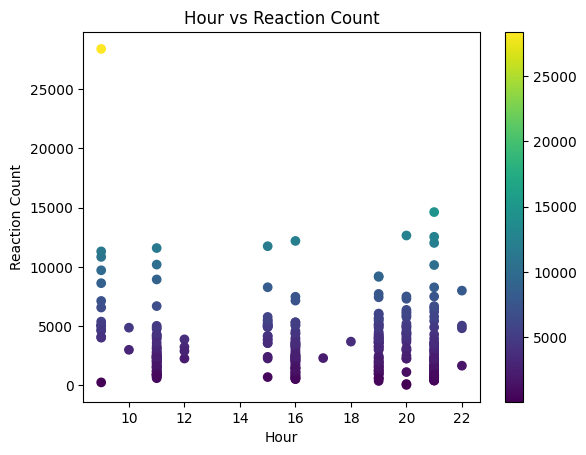

In [27]:
plt.scatter(df['hour'], df['reaction_count'], c=df['reaction_count'])
plt.title('Hour vs Reaction Count')
plt.xlabel('Hour')
plt.ylabel('Reaction Count')
plt.colorbar()

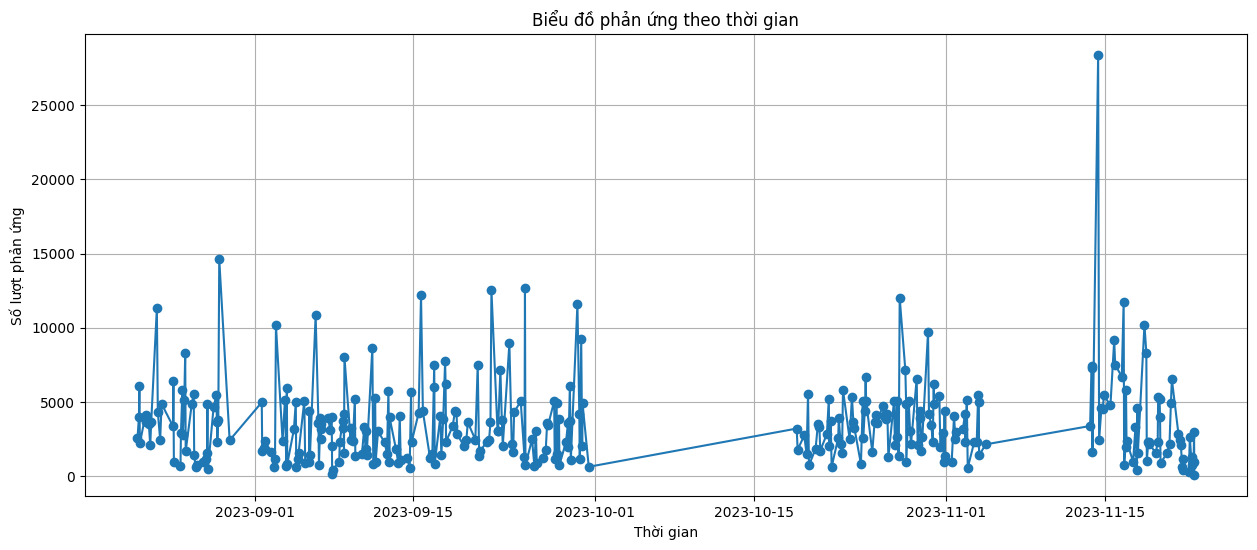

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['reaction_count'], marker='o',linestyle='-')
plt.title('Biểu đồ phản ứng theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()



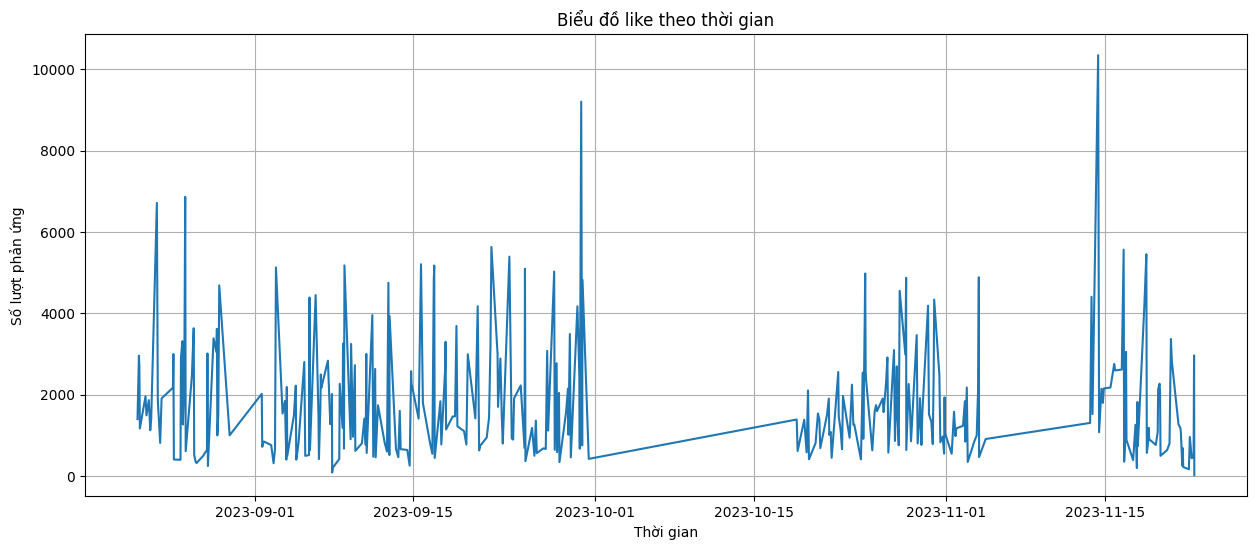

In [29]:

plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['total_likes'],linestyle='-')
plt.title('Biểu đồ like theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

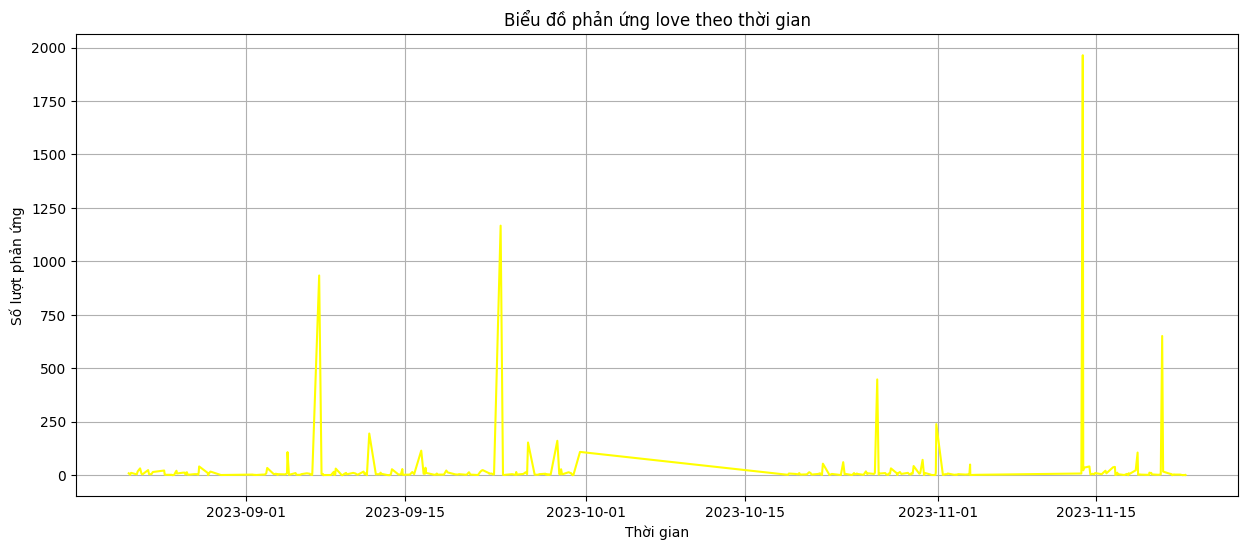

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[ 'total_loves'],linestyle='-',color='yellow')
plt.title('Biểu đồ phản ứng love theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

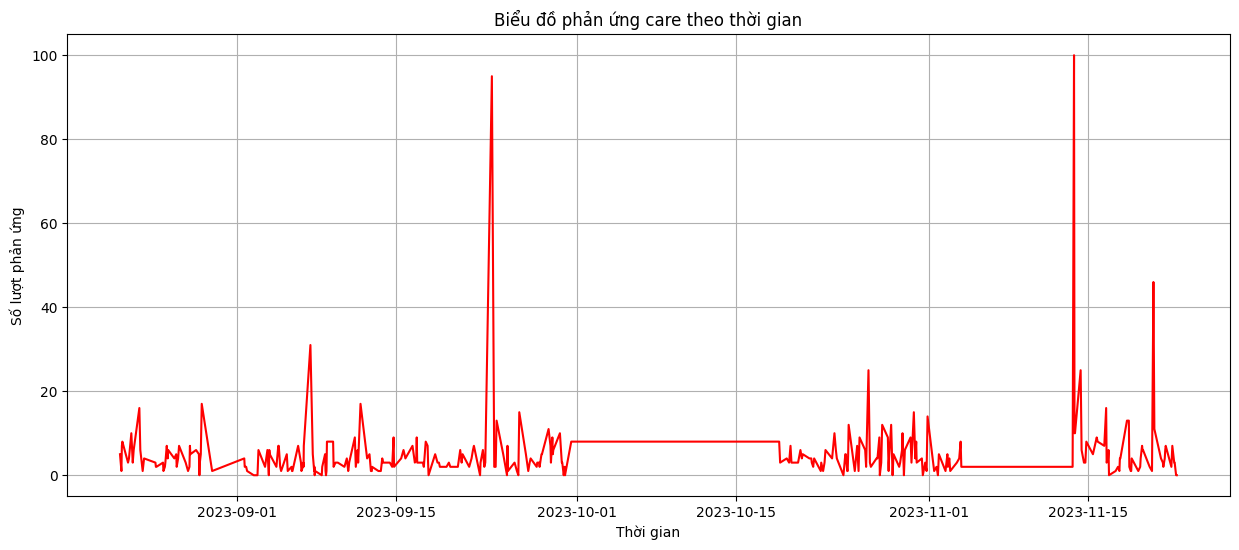

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[ 'total_cares'],linestyle='-',color='red')
plt.title('Biểu đồ phản ứng care theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

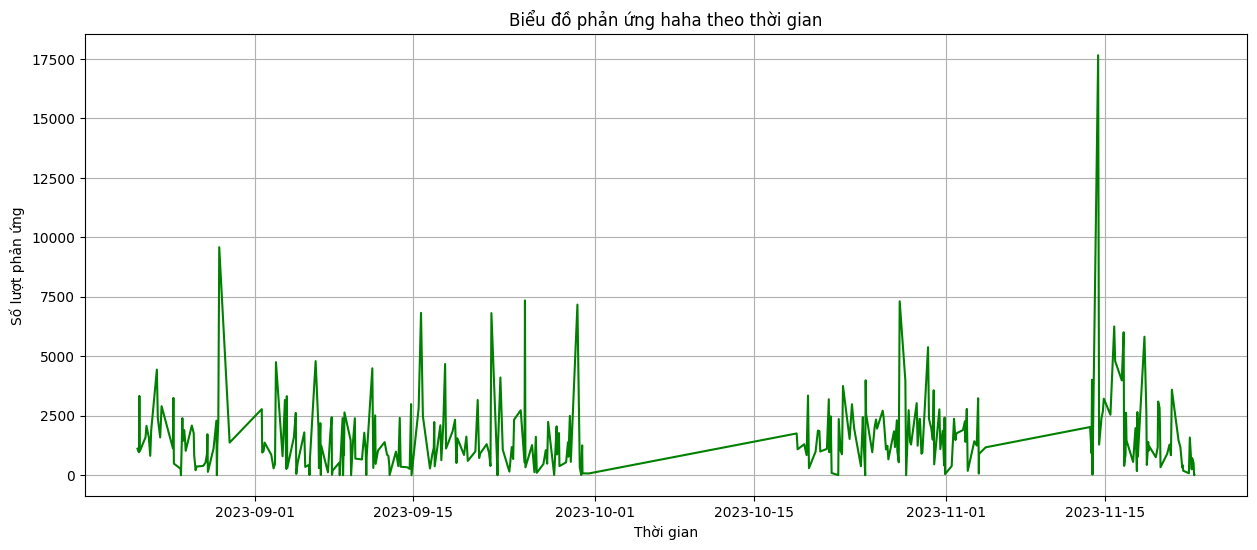

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['total_hahas'],linestyle='-',color='green',)
plt.title('Biểu đồ phản ứng haha theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

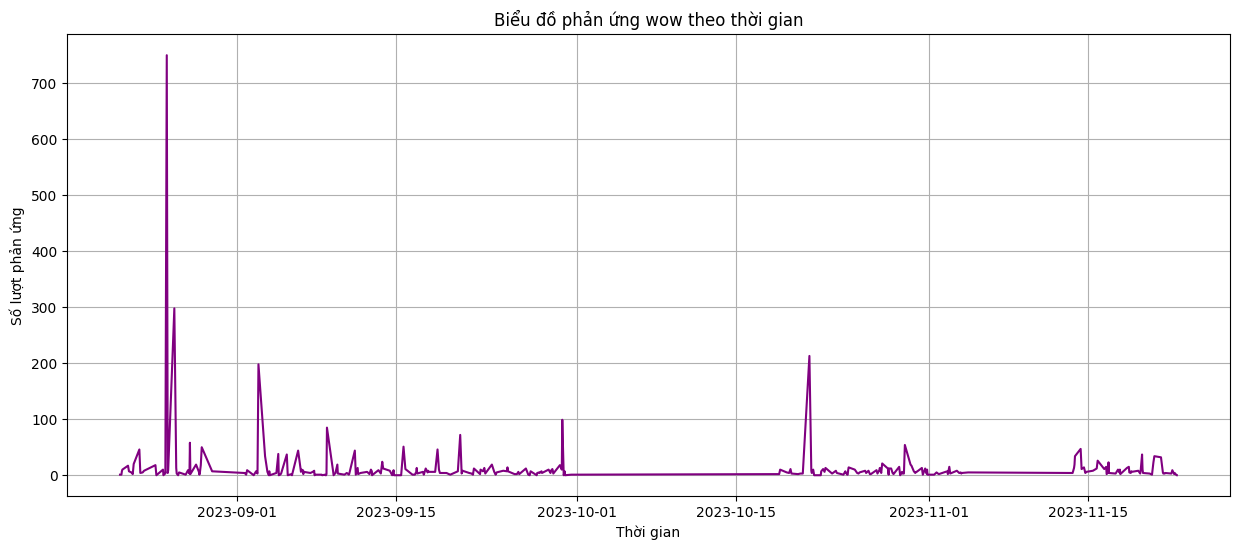

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[ 'total_wows'],linestyle='-',color='purple')
plt.title('Biểu đồ phản ứng wow theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

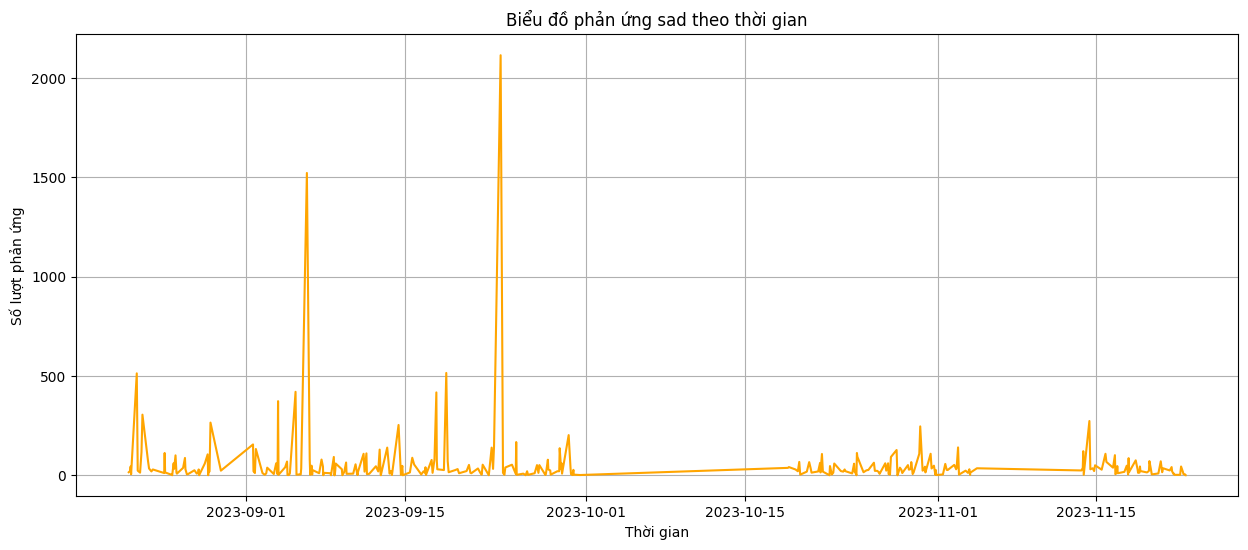

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[ 'total_sads'],linestyle='-',color='orange')
plt.title('Biểu đồ phản ứng sad theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

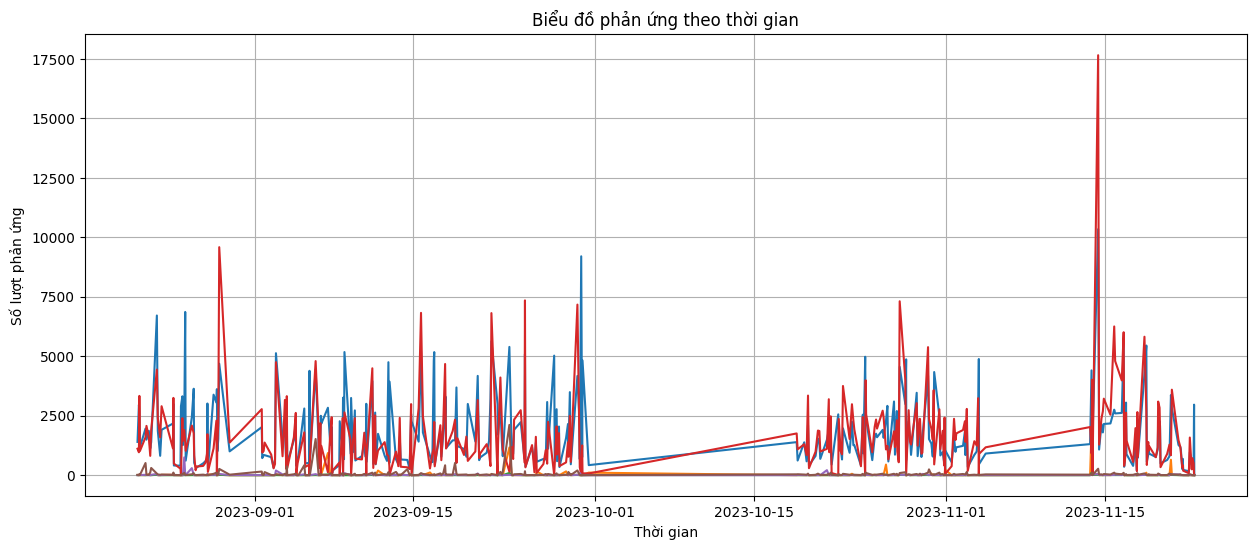

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df[['total_likes', 'total_loves', 'total_cares', 'total_hahas', 'total_wows', 'total_sads']],linestyle='-')
plt.title('Biểu đồ phản ứng theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt phản ứng')
plt.grid(True)
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

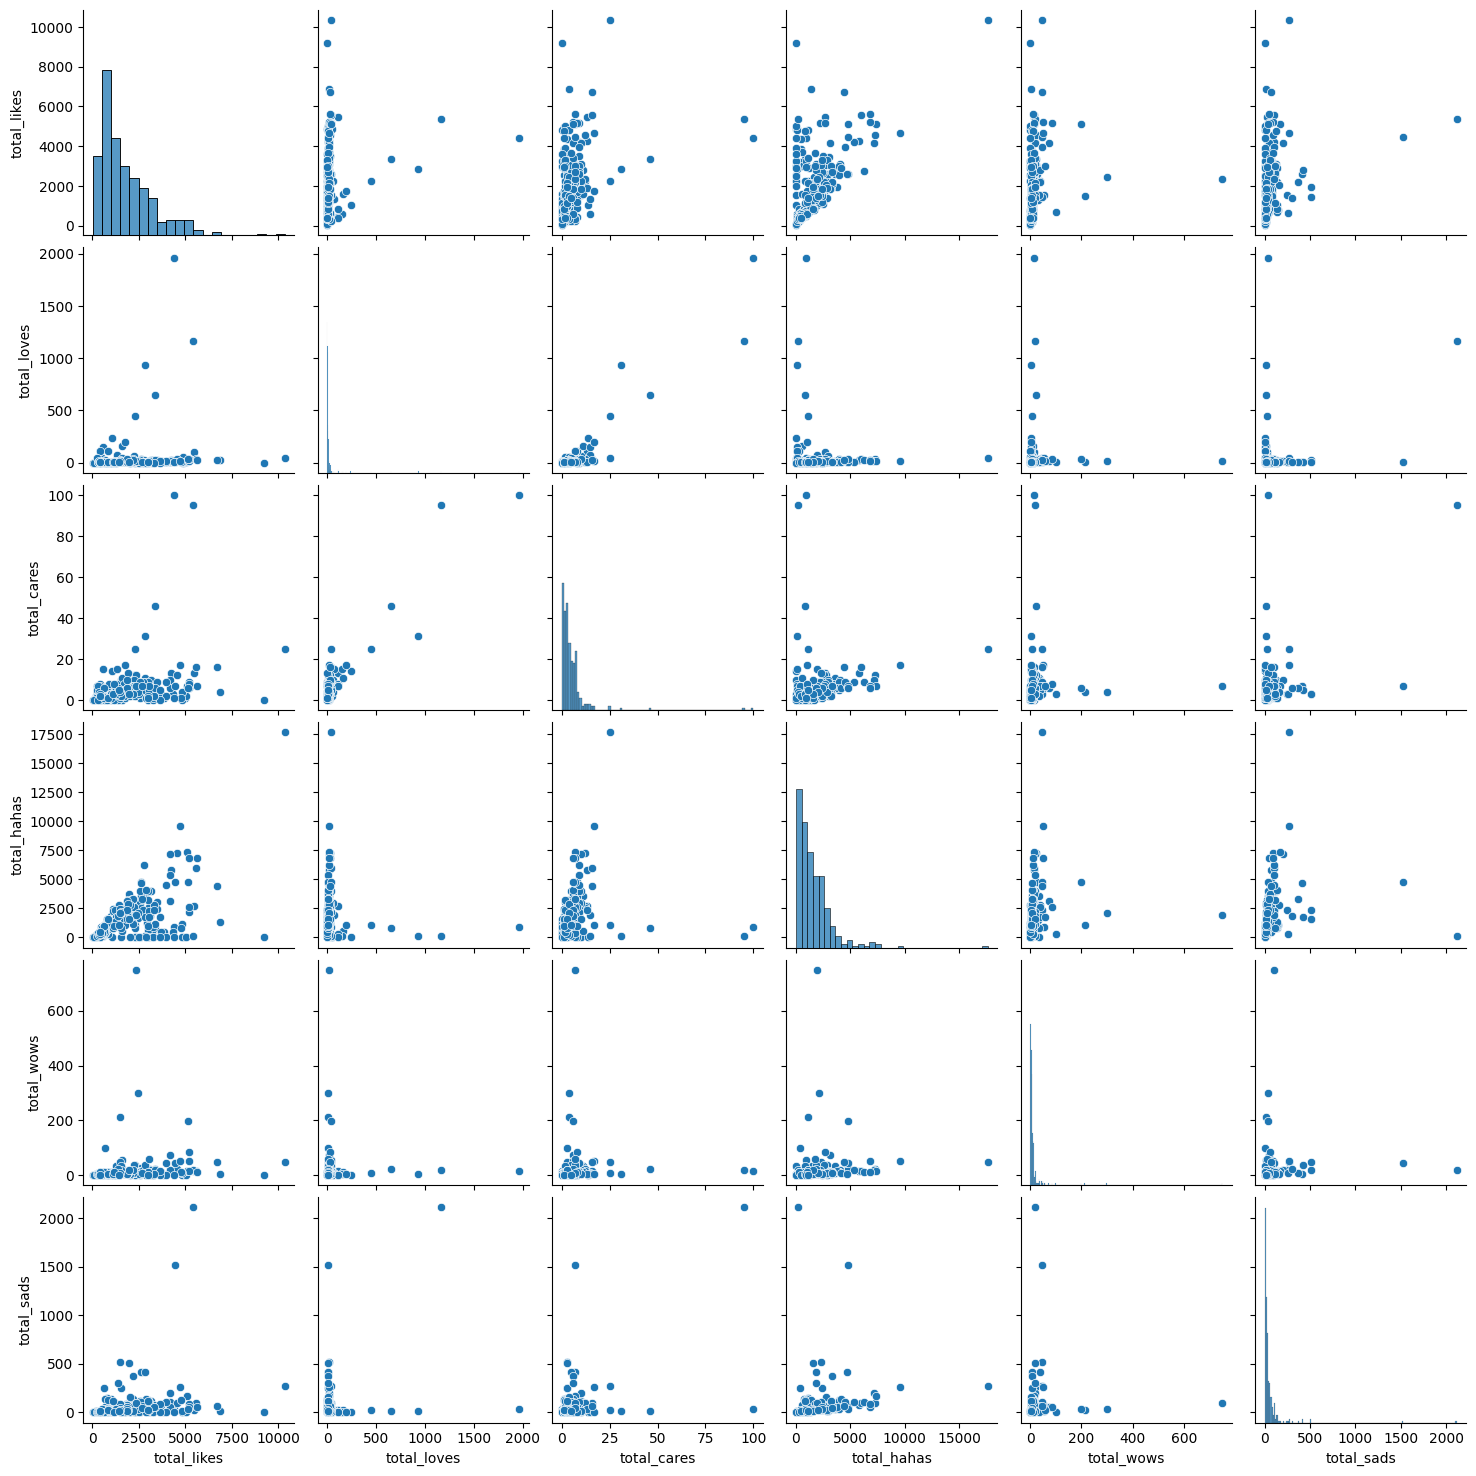

In [36]:
sns.pairplot(df, vars=['total_likes', 'total_loves', 'total_cares', 'total_hahas', 'total_wows', 'total_sads'])

Number of posts with videos: 238
Number of posts without videos: 79


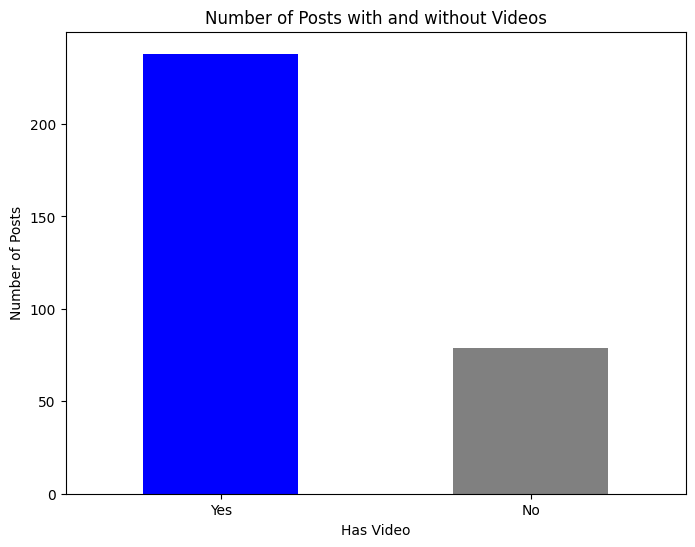

In [37]:

# Assuming 'df' is your DataFrame with a 'video_id' column
# You may need to adjust the column name if it's different in your DataFrame

# Create a new column 'has_video' indicating whether a post has a video or not
df['has_video'] = ~df['video_id'].isnull()

# Count the number of posts with and without videos
video_counts = df['has_video'].value_counts()

# Display the result
print("Number of posts with videos:", video_counts[True])
print("Number of posts without videos:", video_counts[False])

# Alternatively, you can create a bar plot to visualize the information
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['has_video'].value_counts().plot(kind='bar', color=['blue', 'gray'])
plt.title('Number of Posts with and without Videos')
plt.xlabel('Has Video')
plt.ylabel('Number of Posts')
plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
plt.show()


In [38]:
first_row = df.iloc[109]
first_row['reactions']
reactions = first_row['reactions']
reactions["shares"] = first_row['shares']
reactions["comments"] =first_row['comments']
reactions


{'thích': 3838,
 'yêu thích': 4,
 'haha': 495,
 'wow': 1,
 'thương thương': 1,
 'buồn': 8,
 'shares': 13,
 'comments': 41}

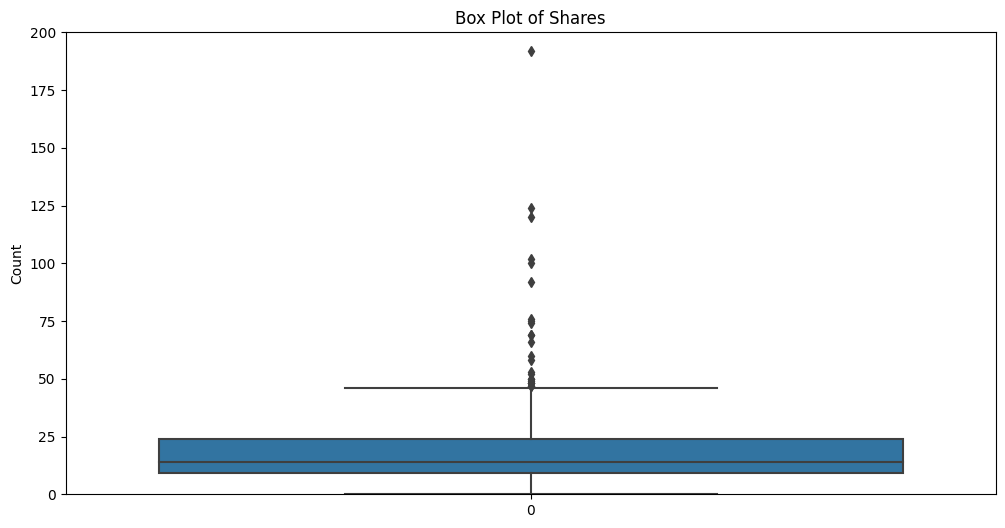

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['shares'])
plt.title('Box Plot of Shares')
plt.ylabel('Count')

# Giới hạn giá trị trục y từ 0 đến 200
plt.ylim(0, 200)

plt.show()


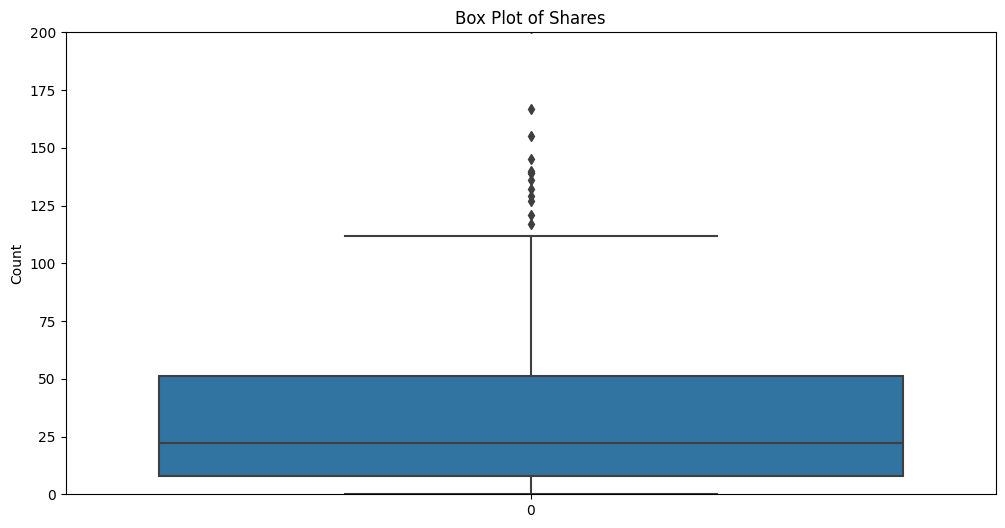

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['total_sads'])
plt.title('Box Plot of Shares')
plt.ylabel('Count')

# Giới hạn giá trị trục y từ 0 đến 200
plt.ylim(0, 200)

plt.show()


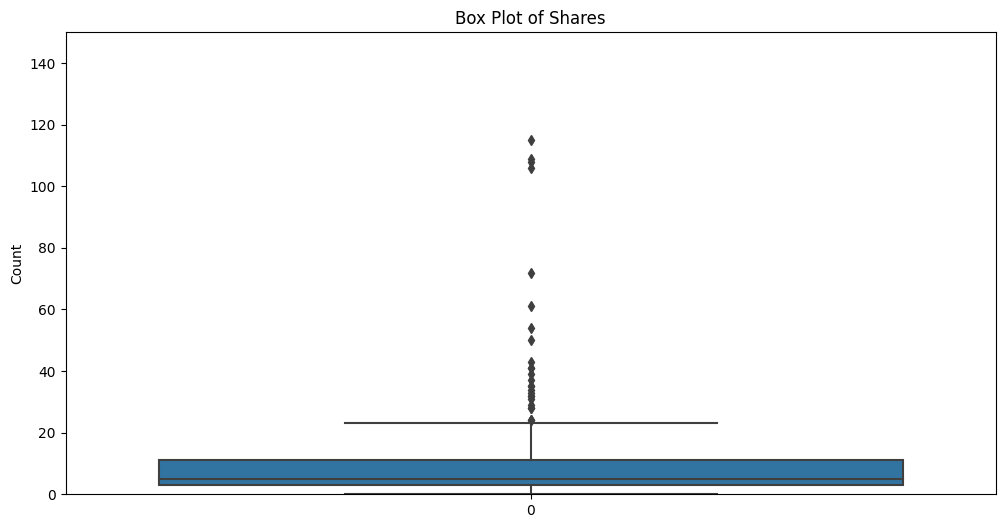

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['total_loves'])
plt.title('Box Plot of Shares')
plt.ylabel('Count')

# Giới hạn giá trị trục y từ 0 đến 200
plt.ylim(0, 150)

plt.show()


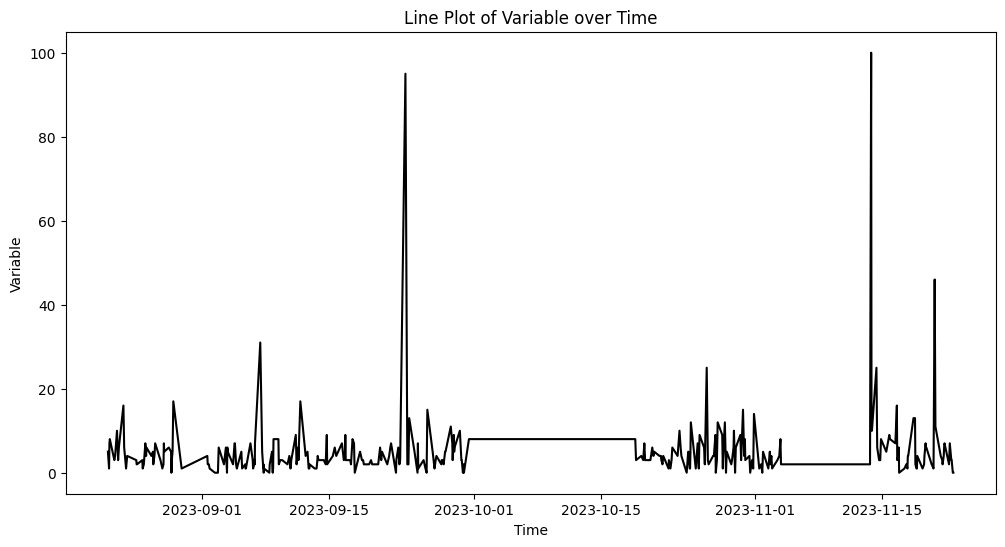

In [42]:
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df['total_cares'])
# plt.title('Box Plot of Shares')
# plt.ylabel('Count')

# # Giới hạn giá trị trục y từ 0 đến 200
# plt.ylim(0, 120)

# plt.show()
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['total_cares'], linestyle='-', color='black')
plt.title('Line Plot of Variable over Time')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.show()



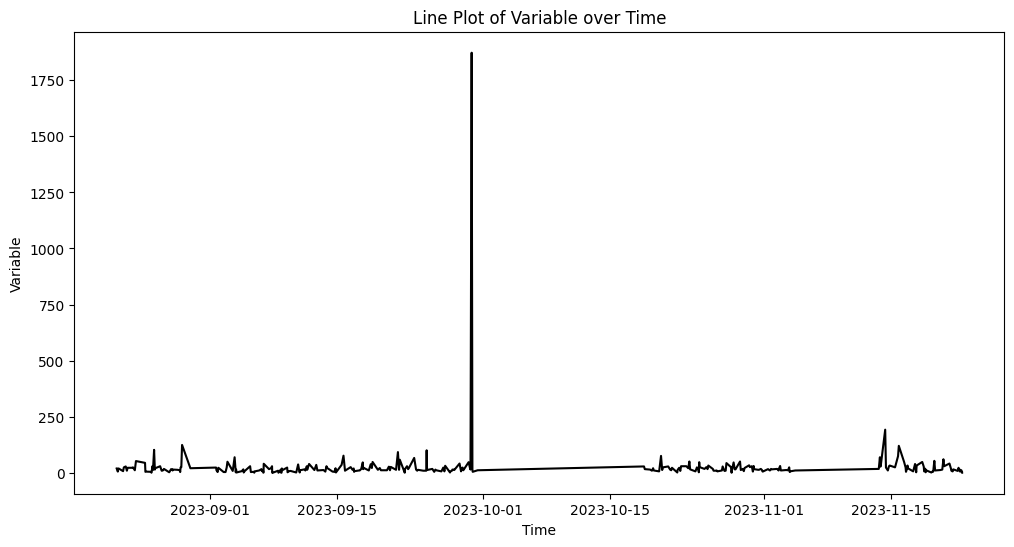

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['shares'], linestyle='-', color='black')
plt.title('Line Plot of Variable over Time')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.show()


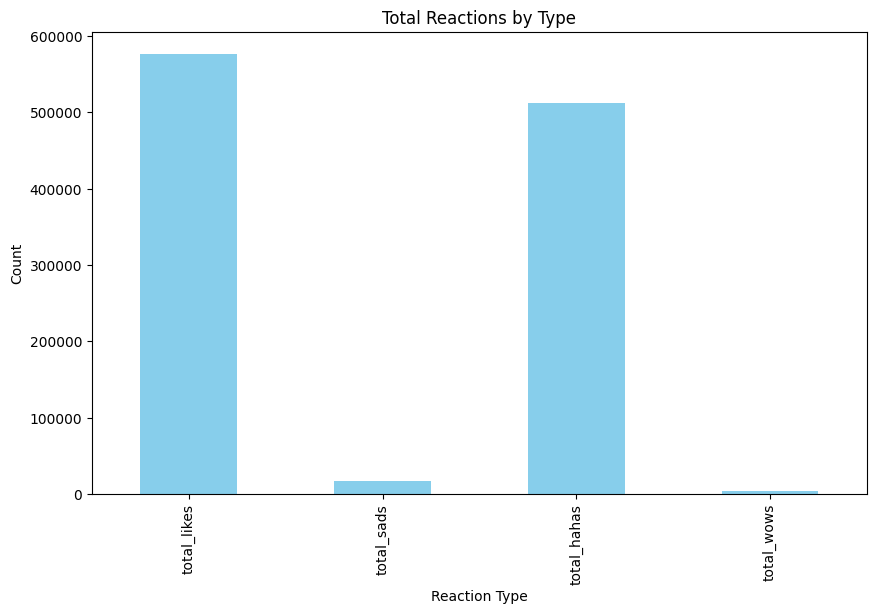

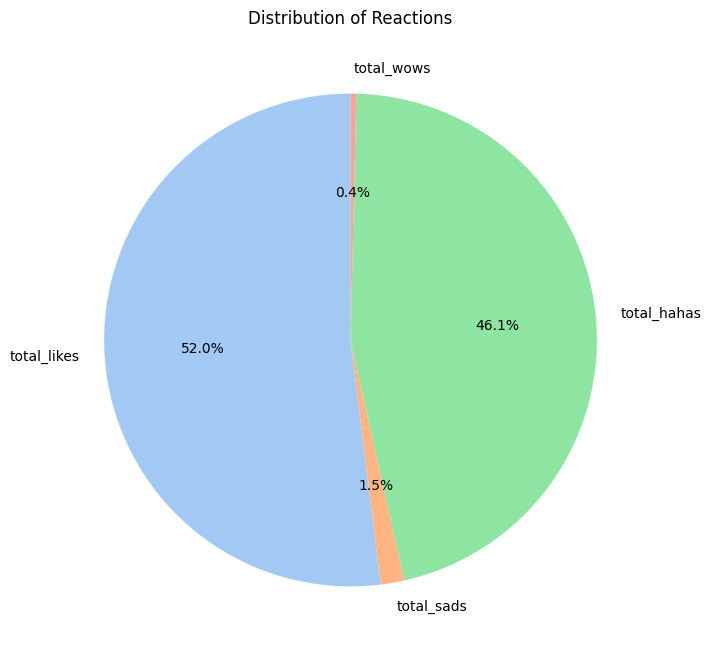

In [44]:
# Chuyển đổi cột 'time' sang định dạng datetime nếu nó chưa phải
df['time'] = pd.to_datetime(df['time'])
# Trước khi thực hiện phép toán, chuyển đổi 'inf' thành 'NaN'
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# # Biểu đồ hộp (box plot) để hiển thị phân phối của các tham số
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df['total_likes'])
# plt.title('Box Plot of Likes')
# plt.ylabel('Count')
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[ 'comments'])
# plt.title('Box Plot of Comments')
# plt.ylabel('Count')
# plt.show()


# Phân tích phản ứng theo từng loại
reactions_columns = ['total_likes', 'total_sads', 'total_hahas', 'total_wows']
reactions_sum = df[reactions_columns].sum()

# Vẽ biểu đồ cột cho tổng số phản ứng của từng loại
plt.figure(figsize=(10, 6))
reactions_sum.plot(kind='bar', color='skyblue')
plt.title('Total Reactions by Type')
plt.xlabel('Reaction Type')
plt.ylabel('Count')
plt.show()

# Vẽ biểu đồ tròn cho tỷ lệ phản ứng
plt.figure(figsize=(8, 8))
plt.pie(reactions_sum, labels=reactions_sum.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Reactions')
plt.show()

# # Kiểm tra tần suất xuất hiện của hình ảnh và video
# image_counts = df['image'].notna().sum()


# # Vẽ biểu đồ cột cho tần suất xuất hiện của hình ảnh và video
# plt.bar(['Images', 'Videos'], [image_counts, video_counts])
# plt.xlabel('Content Type')
# plt.ylabel('Frequency')
# plt.title('Frequency of Image and Video Content')
# plt.show()


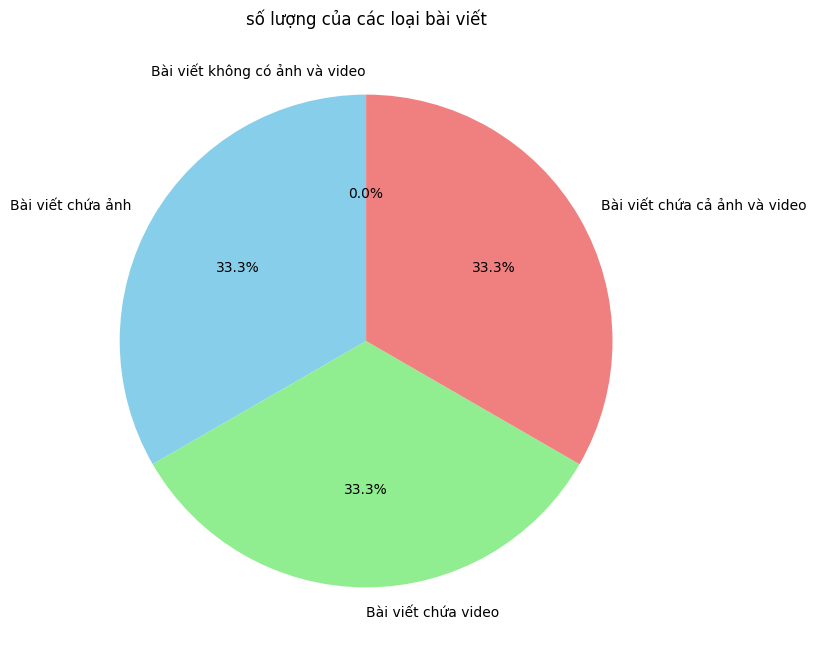

In [45]:
df['Has_image'] = df['image'].astype(bool)
df['Has_video'] = df['video_id'].astype(bool)
image_post = df.loc[df['Has_image'] == True]
video_post = df.loc[df['Has_video'] == True]
both_image_video_post = df.loc[(df['Has_video'] == True) & (df['Has_image'] == True) ]
not_image_video_post = df.loc[(df['Has_video'] ==False) & (df['Has_image'] == False) ]
number_image_post = len(image_post)
number_video_post = len(video_post)
number_both_image_video_post = len(both_image_video_post)
number_not_image_video_post = len(not_image_video_post)
number_counts = [number_image_post, number_video_post, number_both_image_video_post, number_not_image_video_post]
labels = ['Bài viết chứa ảnh', 'Bài viết chứa video', 'Bài viết chứa cả ảnh và video', 'Bài viết không có ảnh và video']
plt.figure(figsize=(8, 8))
plt.pie(number_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('số lượng của các loại bài viết')
plt.show()

In [51]:
#df_text = post_df_full[['post_id','post_text']]
#df_text= pd.read_csv('Data/anhdaden1.csv').dropna(axis=1,how='all')
text    = str(df['post_text'])


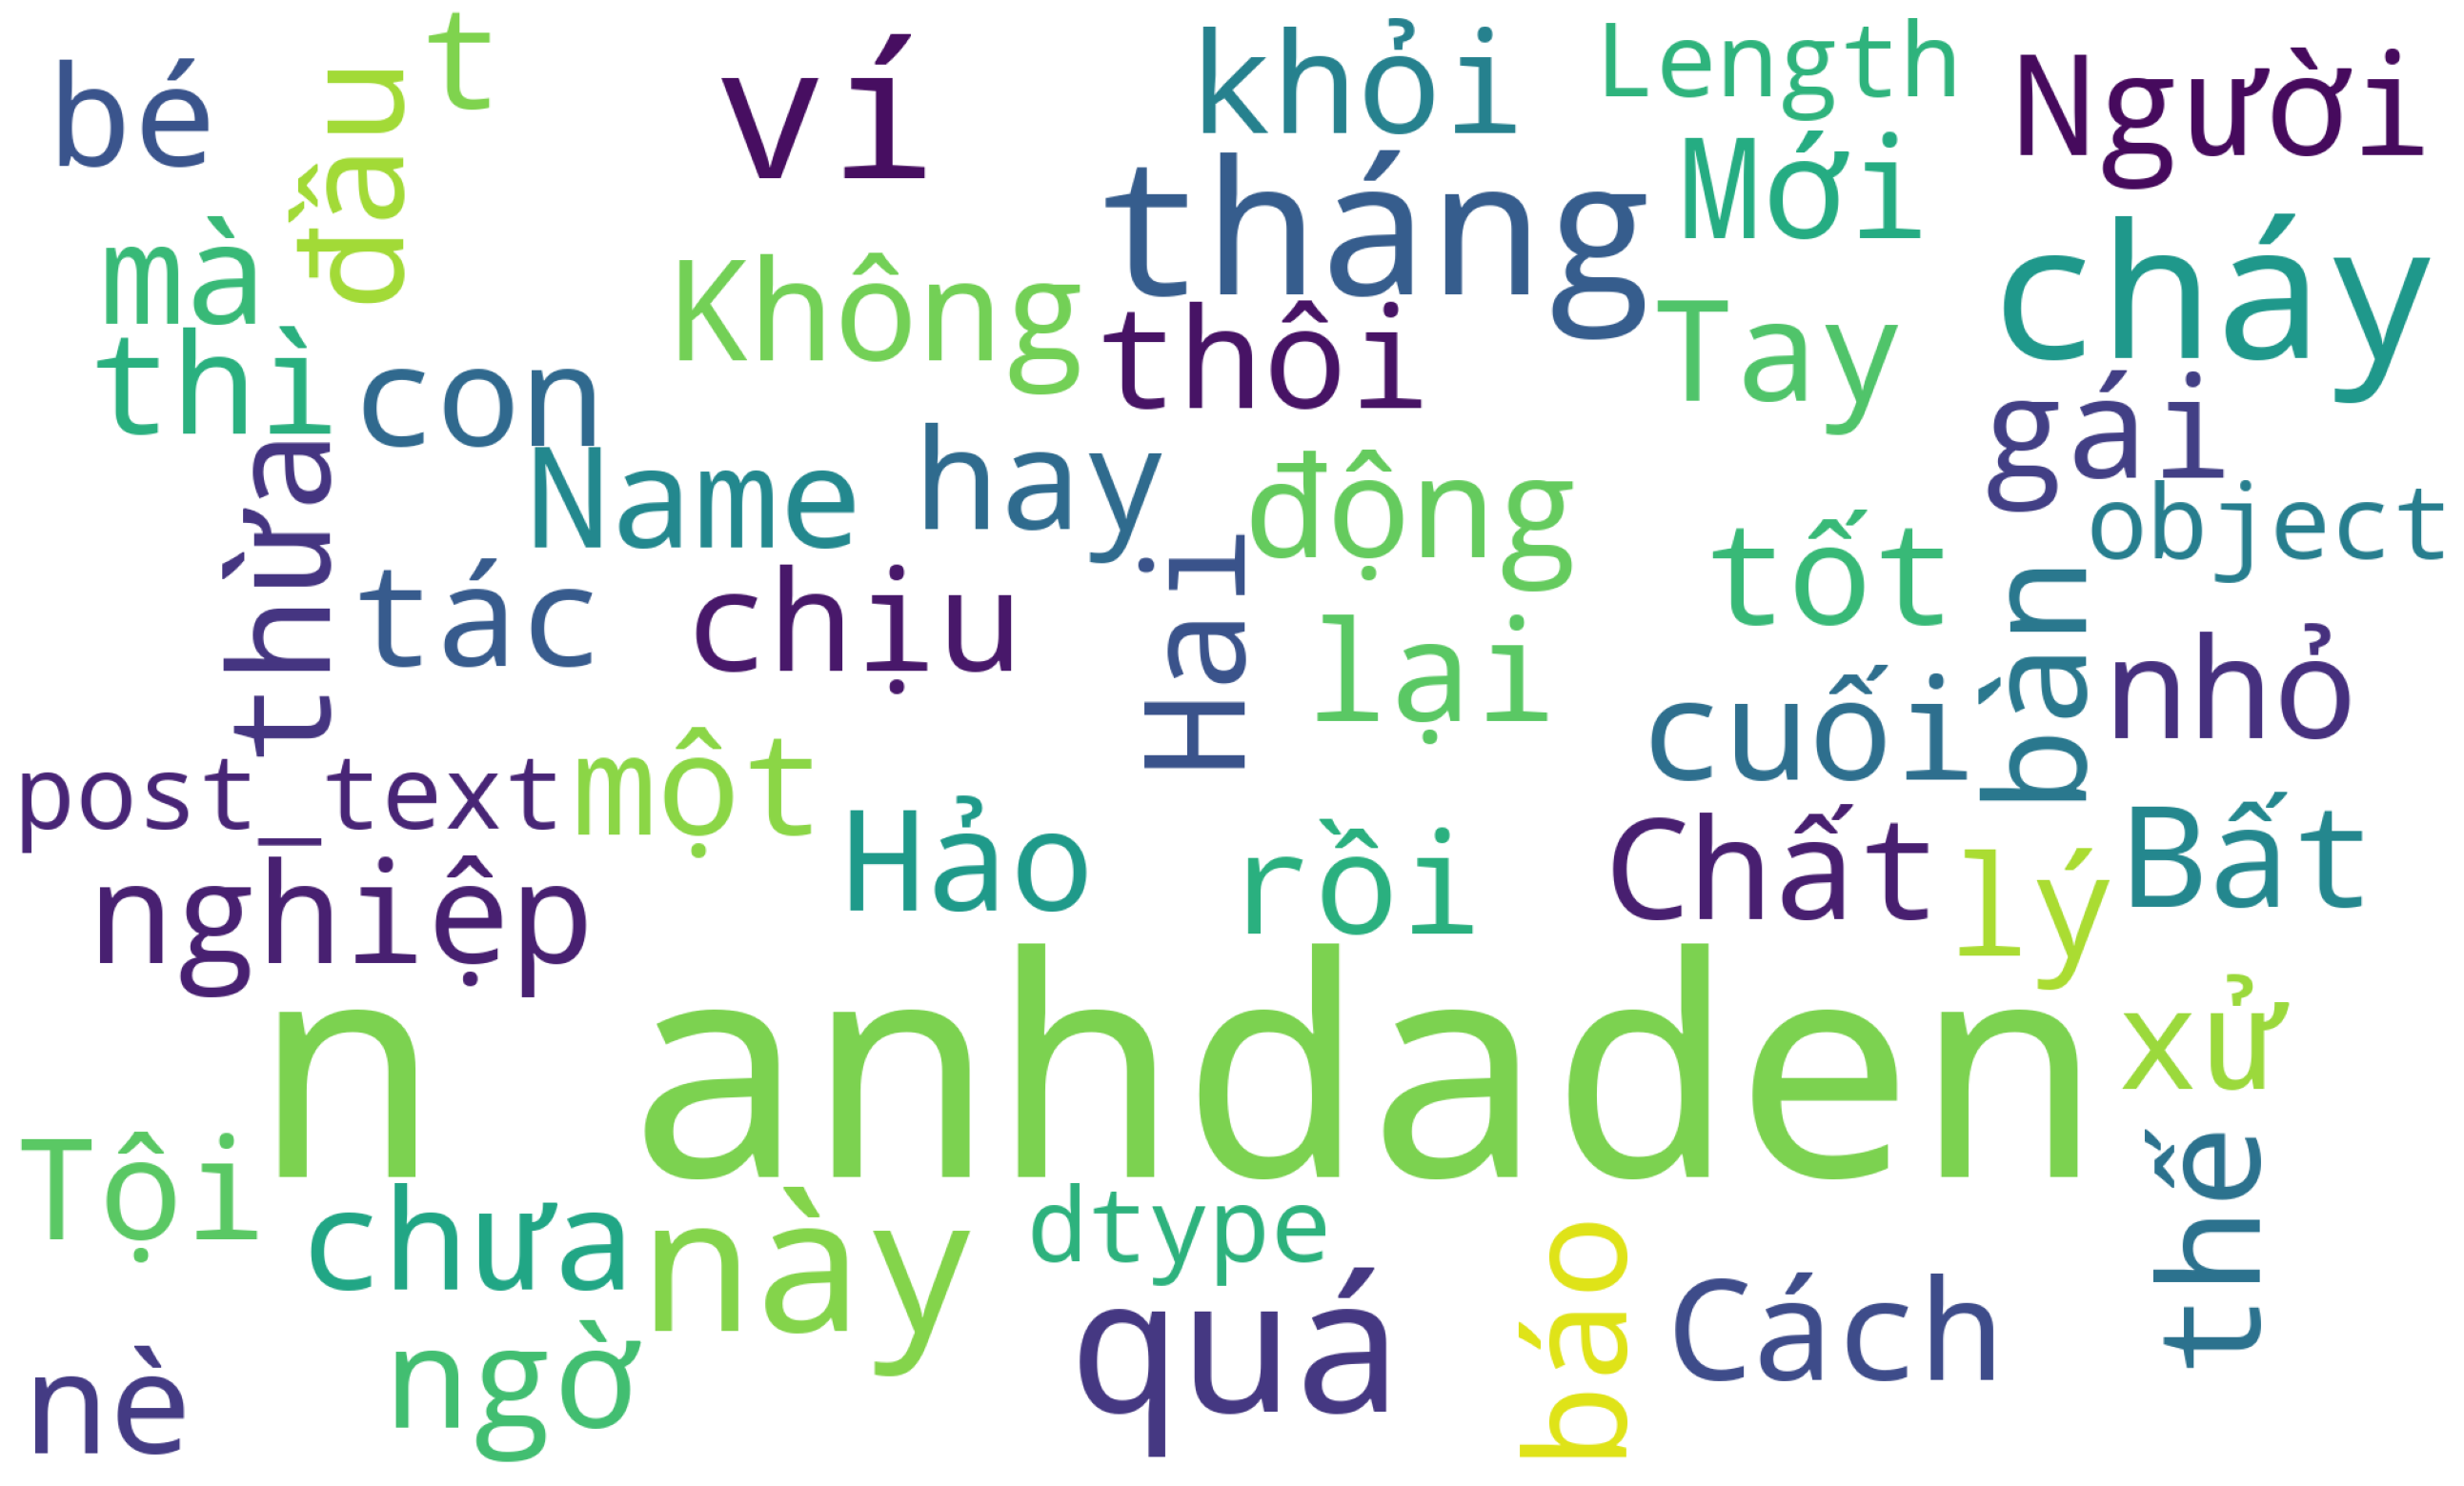

In [52]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()